In [ ]:
import pandas as pd

In [ ]:
a=pd.read_csv('/content/diamonds.csv')

In [ ]:
print(a)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
49995   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
49996   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
49997   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
49998   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
49999   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[50000 rows x 10 columns]


In [ ]:
a.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
a['cut'].value_counts()

Ideal        19938
Premium      12806
Very Good    11204
Good          4557
Fair          1495
Name: cut, dtype: int64

In [ ]:
cut = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
a['cut'] = a['cut'].map(cut)

In [ ]:
a['color'].value_counts()

G    10452
E     9085
F     8864
H     7711
D     6224
I     5058
J     2606
Name: color, dtype: int64

In [ ]:
color = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}
a['color'] = a['color'].map(color)

In [ ]:
a['clarity'].value_counts()

SI1     12115
VS2     11404
SI2      8519
VS1      7579
VVS2     4694
VVS1     3369
IF       1632
I1        688
Name: clarity, dtype: int64

In [ ]:
clarity = {'I1': 1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8 }
a['clarity'] = a['clarity'].map(clarity)

In [ ]:
print(a)

       carat  cut  color  clarity  depth  table  price     x     y     z
0       0.23    5      6        2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    4      6        3   59.8   61.0    326  3.89  3.84  2.31
2       0.23    2      6        5   56.9   65.0    327  4.05  4.07  2.31
3       0.29    4      2        4   62.4   58.0    334  4.20  4.23  2.63
4       0.31    2      1        2   63.3   58.0    335  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
49995   0.72    5      7        3   60.8   57.0   2757  5.75  5.76  3.50
49996   0.72    2      7        3   63.1   55.0   2757  5.69  5.75  3.61
49997   0.70    3      7        3   62.8   60.0   2757  5.66  5.68  3.56
49998   0.86    4      3        2   61.0   58.0   2757  6.15  6.12  3.74
49999   0.75    5      7        2   62.2   55.0   2757  5.83  5.87  3.64

[50000 rows x 10 columns]


LINEAR REGRESSION
Root Mean Squared Error: 1186.4845496566309
Root Mean Absolute Error: 28.041482290571405


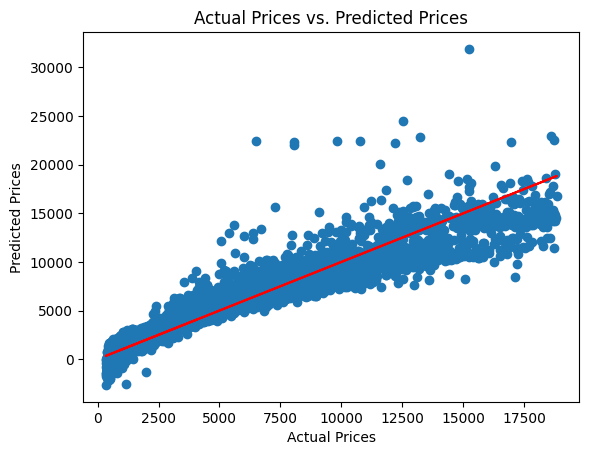

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = a.drop('price', axis=1)
y = a['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the prices on the test set
predictions = model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
mse = np.sqrt(mean_squared_error(y_test, predictions))
mae = np.sqrt(mean_absolute_error(y_test, predictions))
print("LINEAR REGRESSION")
print("Root Mean Squared Error:", mse)
print("Root Mean Absolute Error:", mae)

import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')

# Draw a line for perfect correlation. The plot is for regression, so we use a line to show the perfect fit.
plt.plot(y_test, y_test, color='red')

plt.show()




Support Vector Machine(SVM):
Mean Squared Error (MSE): 2967049.1538787787
Mean Absolute Error (MAE): 990.2357785278473


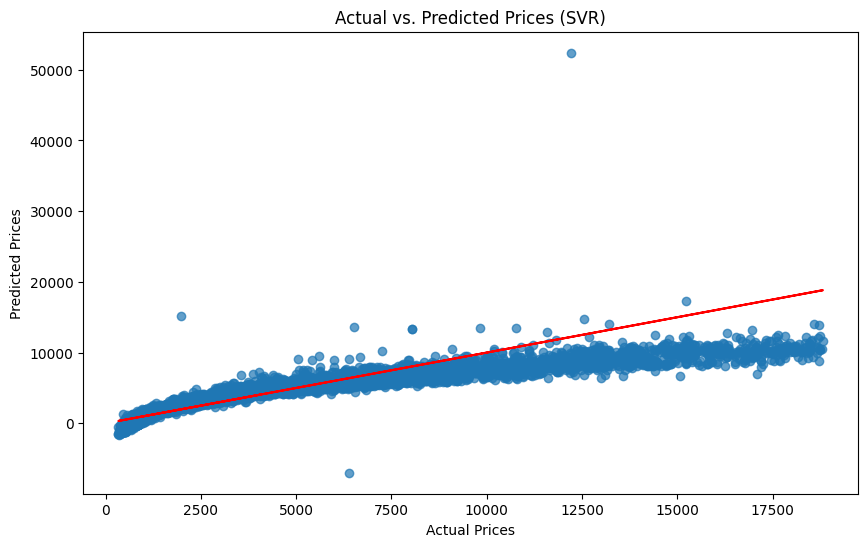

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Initialize Support Vector Machine for Regression (SVR) model
svr_reg = SVR(kernel='linear', C=1.0)  # You can adjust the kernel and C parameter

# Fit the model to the training data
svr_reg.fit(X_train, y_train)

# Make predictions on the test set
svr_y_pred = svr_reg.predict(X_test)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_mae = mean_absolute_error(y_test, svr_y_pred)

print("\nSupport Vector Machine(SVM):")
print(f"Mean Squared Error (MSE): {svr_mse}")
print(f"Mean Absolute Error (MAE): {svr_mae}")

# Create a scatter plot to visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_y_pred, alpha=0.7)
plt.plot(y_test, y_test, color='red')  # Line for perfect fit
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (SVR)')
plt.show()
